# Sistem Rekomendasi Handphone

Nama: Ahmad Radesta

Username: ahmad007

## 1.Domain Proyek

Seiring dengan perkembangan teknologi, pasar ponsel pintar mengalami pertumbuhan yang sangat pesat dengan hadirnya berbagai merek dan model baru setiap tahunnya. Pengguna sering dihadapkan pada tantangan dalam memilih ponsel yang tepat dari sekian banyak pilihan yang tersedia. Kompleksitas spesifikasi teknis seperti kapasitas baterai, resolusi kamera, kecepatan prosesor, dan jenis sistem operasi membuat proses pengambilan keputusan menjadi semakin sulit, terutama bagi konsumen yang tidak memiliki pengetahuan teknis yang mendalam.

> Referensi:  
> Chandrahaas, B.V. & Panigrahi, Bhawani & Pande, Sagar & Swain, Nirmal. (2023). A Hybrid Approach for Mobile Phone Recommendation using Content-Based and Collaborative Filtering. EA! Endorsed Transactions on Internet of Things.
10.4108/eetiot.4594

> Web Information Systems Engineering – WISE 2014, 2014, Volume 8786
ISBN : 978-3-319-11748-5
Bozhi Yuan, Bin Xu, Tonglee Chung, Kaiyan Shuai, Yongbin Liu

## 2.Business Understanding

### Problem Statements
1. Bagaimana sistem dapat membantu pengguna menemukan ponsel yang paling sesuai dengan kebutuhan dan preferensi mereka berdasarkan riwayat rating?
2. Bagaimana sistem dapat merekomendasikan ponsel yang mirip dengan ponsel lama pengguna, bahkan ketika pengguna tidak memahami spesifikasi teknisnya?

### Goals
- Membangun sistem rekomendasi ponsel berbasis data rating pengguna sebelumnya agar sistem dapat mengusulkan produk yang paling disukai.

- Membangun sistem rekomendasi berdasarkan input model ponsel lama, sehingga pengguna bisa mendapatkan alternatif yang mirip dari segi fitur dan performa.


### Solution Statement
- Content-Based Filtering: Menggunakan fitur deskriptif dari ponsel (misalnya merek, model, sistem operasi) untuk memberikan rekomendasi yang serupa dengan produk yang pernah disukai pengguna.

- Collaborative Filtering: Menggunakan pola rating dari banyak pengguna untuk merekomendasikan produk berdasarkan kesamaan preferensi antar pengguna.

## 3.Data Understanding

Dataset diambil dari [Cellphones Recomendation](https://www.kaggle.com/datasets/meirnizri/cellphones-recommendations/data).

**Informasi Dataset**

## 📊 Data Understanding

### 1. `cellphones data.csv`

Dataset ini berisi informasi deskriptif mengenai berbagai ponsel pintar yang menjadi objek rekomendasi.

- **Jumlah Data:** 33 baris × 14 kolom
- **Kolom Utama:**
  - `cellphone_id`: ID unik untuk setiap ponsel
  - `brand`: Merek ponsel (contoh: Apple, Samsung)
  - `model`: Model ponsel (contoh: iPhone 13)
  - `operating system`: Sistem operasi (iOS, Android, dll.)
  - `internal memory`, `RAM`: Spesifikasi penyimpanan dan memori
  - `performance`: Skor performa (kemungkinan dari benchmark)
  - `main camera`, `selfie camera`: Resolusi kamera (dalam MP)
  - `battery size`: Kapasitas baterai (mAh)
  - `screen size`: Ukuran layar (inci)
  - `weight`: Berat (gram)
  - `price`: Harga dalam USD
  - `release date`: Tanggal rilis

---

### 2. `cellphones ratings.csv`

Dataset ini berisi nilai rating yang diberikan oleh pengguna terhadap ponsel tertentu.

- **Jumlah Data:** 990 baris × 3 kolom
- **Kolom Utama:**
  - `user_id`: ID pengguna
  - `cellphone_id`: ID ponsel yang dirating
  - `rating`: Skala penilaian (0–10)

---

### 3. `cellphones users.csv`

Dataset ini memberikan informasi demografis pengguna yang memberikan rating.

- **Jumlah Data:** 99 baris × 4 kolom
- **Kolom Utama:**
  - `user_id`: ID unik pengguna
  - `age`: Usia pengguna
  - `gender`: Jenis kelamin
  - `occupation`: Pekerjaan pengguna

---

### 🔗 Ringkasan Keterkaitan

Ketiga dataset ini saling terhubung:
- `cellphones ratings.csv` mengaitkan pengguna (`user_id`) dan produk (`cellphone_id`) melalui rating.
- `cellphones users.csv` dapat dimanfaatkan untuk segmentasi atau rekomendasi berbasis demografi.
- `cellphones data.csv` menyediakan fitur deskriptif untuk diterapkan pada Content-Based Filtering.


In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [ ]:
#Unzip dataset
!unzip archive.zip

Archive:  archive.zip
replace cellphones data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cellphones data.csv     
replace cellphones ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cellphones ratings.csv  
replace cellphones users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cellphones users.csv    


In [ ]:
#Membaca dataset
data = pd.read_csv('/content/cellphones data.csv')
rating = pd.read_csv('/content/cellphones ratings.csv')
users = pd.read_csv('/content/cellphones users.csv')

In [ ]:
#Menampilkan info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


In [ ]:
#Menampilkan isi dari variabel data
data.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [ ]:
#Menampilkan info dari dataset
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


In [ ]:
#Menampilkan isi dari variabel rating
rating.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [ ]:
#Menampilkan info dari dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
#Menampilkan isi dari variabel users
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


 Distribusi Rating Pengguna

<ipython-input-11-99ed2f5b09ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=rating, palette="Set2")


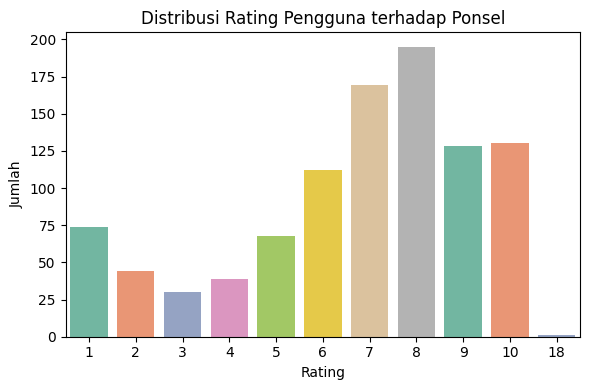

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="rating", data=rating, palette="Set2")
plt.title("Distribusi Rating Pengguna terhadap Ponsel")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


Distribusi Usia Pengguna

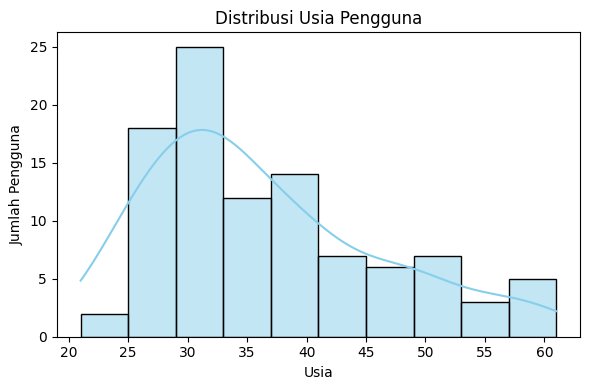

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(users["age"], bins=10, kde=True, color="skyblue")
plt.title("Distribusi Usia Pengguna")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pengguna")
plt.tight_layout()
plt.show()

Distribusi Harga Ponsel

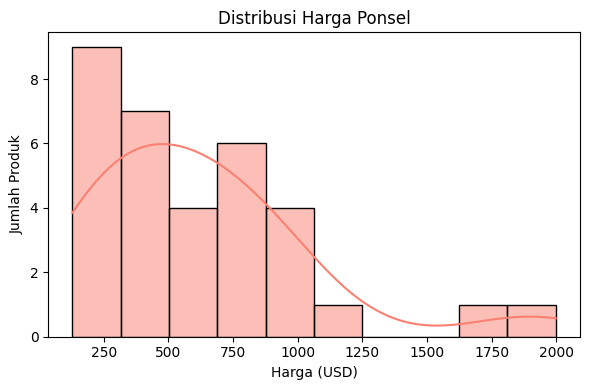

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data["price"], bins=10, kde=True, color="salmon")
plt.title("Distribusi Harga Ponsel")
plt.xlabel("Harga (USD)")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

Jumlah Produk per Brand

<ipython-input-14-411fae555e9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="brand", data=data, order=data["brand"].value_counts().index, palette="viridis")


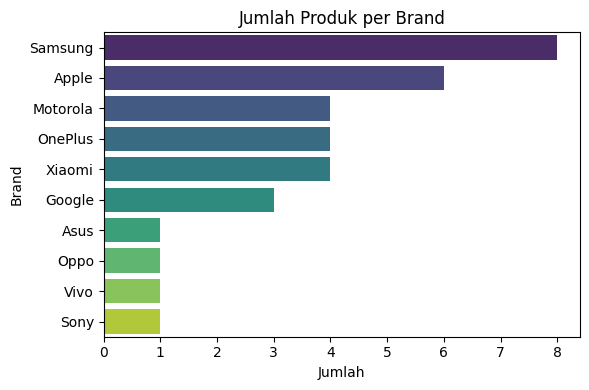

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(y="brand", data=data, order=data["brand"].value_counts().index, palette="viridis")
plt.title("Jumlah Produk per Brand")
plt.xlabel("Jumlah")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

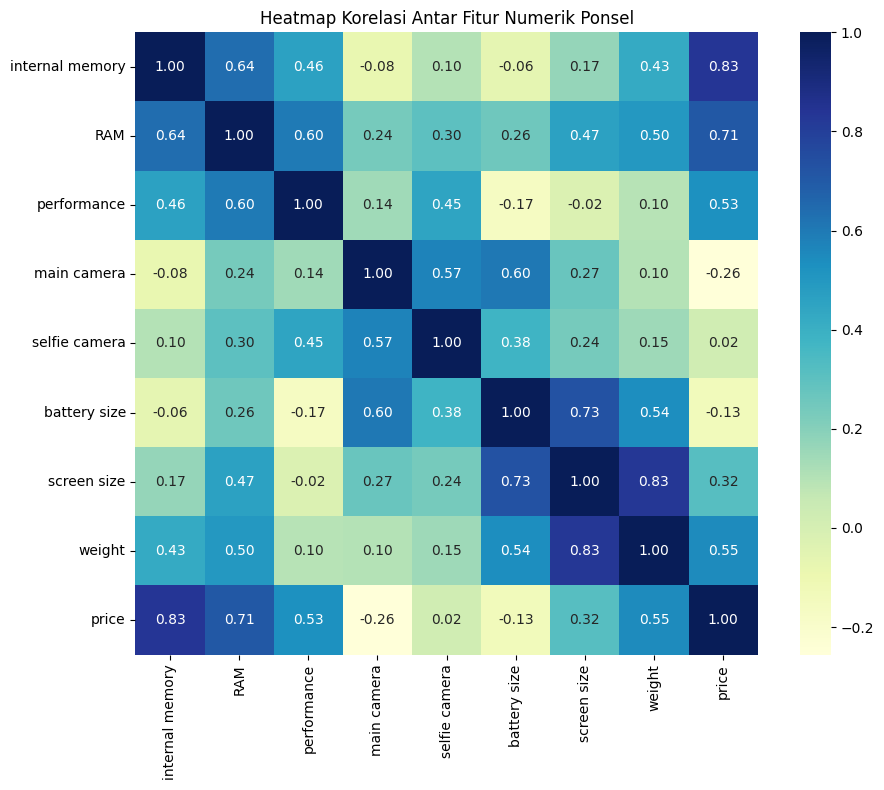

In [ ]:
numeric_cols = [
    'internal memory', 'RAM', 'performance', 'main camera',
    'selfie camera', 'battery size', 'screen size', 'weight', 'price'
]

correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", square=True)
plt.title("Heatmap Korelasi Antar Fitur Numerik Ponsel")
plt.tight_layout()
plt.show()

#Data Preprocessing

Menggabungkan dataset data, rating, dan users menjadi satu.

In [ ]:
ratings_data = pd.merge(rating, data, on='cellphone_id')
merged_data = pd.merge(ratings_data, users, on='user_id')
merged_data.head()

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,Data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,Data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,Data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,Data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,Data analyst


Melakukan cek missing value.

In [ ]:
#Cek missing value
merged_data.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Output kode di atas memberikan informasi :
- Terdapat 10 missing value pada occupation

Drop missing value.

In [ ]:
#Menghapus missing value
merged_data = merged_data.dropna()

Memastikan bahwa tidak terdapat missing value lagi.

In [ ]:
#Cek missing value
merged_data.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Output kode di atas memberikan informasi :
- Sudah tidak terdapat missing value.

Berdasarkan univariate analysis terdapat outlier pada kolom rating, terdapat kesalahan tulis pada kolom occupation dan terdapat penyamaan nama pekerjaan pada kolom occupation.

In [ ]:
merged_data = merged_data[merged_data['rating'] != 18]
merged_data['occupation'] = merged_data['occupation'].str.lower()
merged_data['occupation'] = merged_data['occupation'].replace('healthare', 'healthcare')
merged_data['occupation'] = merged_data['occupation'].replace('it', 'information technology')

Menampilkan dataset yang sudah dibersihkan.

In [ ]:
#Menampilkan dataset
cleaned_data = merged_data
cleaned_data

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,data analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,258,31,5,Motorola,Moto G Pure,Android,32,3,1.02,13,5,4000,6.5,188,129,14/10/2021,25,Male,executive manager
986,258,17,8,Google,Pixel 6 Pro,Android,128,12,7.19,50,11,5003,6.7,210,699,28/10/2021,25,Male,executive manager
987,258,23,9,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,25,Male,executive manager
988,258,27,8,Xiaomi,Poco F4,Android,128,8,6.98,64,20,4500,6.6,195,428,27/07/2022,25,Male,executive manager


# Data Preparation

In [ ]:
#Menghapus data duplikat
cleaned_data = cleaned_data.drop_duplicates('cellphone_id')

Melakukan konversi data series menjadi list.

In [ ]:
#Melakukan konversi data series menjadi list
cellphone_id = cleaned_data['cellphone_id'].tolist()
brand = cleaned_data['brand'].tolist()
model = cleaned_data['model'].tolist()
operating_system = cleaned_data['operating system'].tolist()

print(len(cellphone_id))
print(len(brand))
print(len(model))
print(len(operating_system))

33
33
33
33


In [ ]:
#Membuat dictionary untuk menentukan pasangan key-value
phone_new = pd.DataFrame({
    'cellphone_id': cellphone_id,
    'brand': brand,
    'model': model,
    'operating_system': operating_system,
})

phone_new

,cellphone_id,brand,model,operating_system
0,30,Motorola,Moto G Play (2021),Android
1,5,Apple,iPhone XR,iOS
2,10,Samsung,Galaxy S22,Android
3,9,Samsung,Galaxy A53,Android
4,23,Vivo,X80 Pro,Android
5,8,Samsung,Galaxy A32,Android
6,22,Oppo,Find X5 Pro,Android
7,16,Google,Pixel 6a,Android
8,19,OnePlus,Nord 2T,Android
9,3,Apple,iPhone 13 Pro,iOS


#Model Development Dengan Content Based Filtering

#Model Development dengan Collaborative Filtering

#Evaluasi

In [ ]:
phone_df = phone_new
df = pd.read_csv('rating.csv')

#Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
cellphone_reviewed_by_user = df[df.user_id == user_id]

cellphone_not_reviewed = phone_df[~phone_df['cellphone_id'].isin(cellphone_reviewed_by_user.cellphone_id.values)]['cellphone_id']
cellphone_not_reviewed = list(
    set(cellphone_not_reviewed)
    .intersection(set(cellphone_to_cellphone_encoded.keys()))
)

cellphone_not_reviewed = [[cellphone_to_cellphone_encoded.get(x)] for x in cellphone_not_reviewed]
user_encoder = user_to_user_encoded.get(user_id)
user_cellphone_array = np.hstack(
    ([[user_encoder]] * len(cellphone_not_reviewed), cellphone_not_reviewed)
)